## Looking for beads by template matching
- [original article](http://pythonvision.org///examples/2011/04/12/beads/)
- [image data url](http://pythonvision.org/media/files/images/blog/2011/beads_original.jpeg)
- method: 
    - method a: describe and properties of beads, doing sementation, labelling with filtering
    - method b: picking a referene template as bead, comparing whole images with the template, highling the maximum

In [7]:
%matplotlib inline

In [26]:
from skimage import io, morphology, measure, filters, feature
import matplotlib.pyplot as plt
import numpy as np

(461, 576, 3)


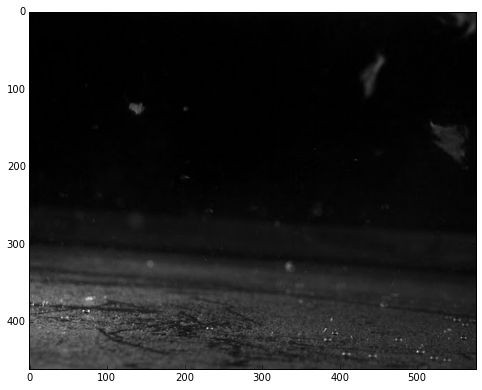

In [9]:
## load the image
img = io.imread("http://pythonvision.org/media/files/images/blog/2011/beads_original.jpeg")
print img.shape
plt.figure(figsize = (8, 8))
plt.imshow(img)

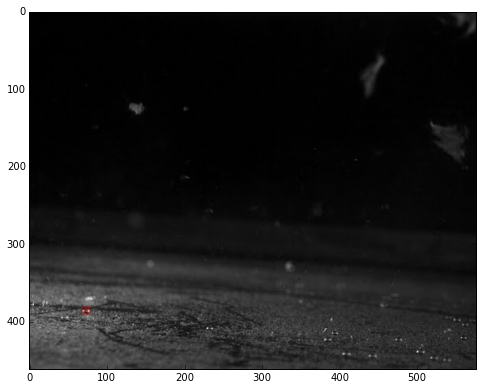

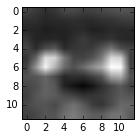

In [70]:
## find a template manually
w = 6
r, c = 386, 73
plt.figure(figsize = (8, 8))
plot_img = img.copy()
plot_img[r-w:r+w, c-w:c+w] = np.array([255, 0, 0])*.25 + plot_img[r-w:r+w, c-w:c+w]*.75
plt.imshow(plot_img)

template = img[r-w:r+w, c-w:c+w]
plt.figure(figsize = (2, 2))
plt.imshow(template)

[ 0.43525161  0.6469166 ]


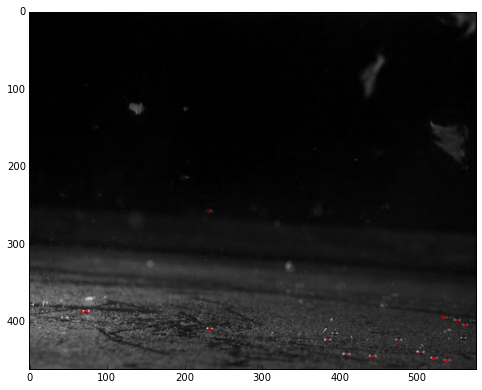

In [74]:
## find the local maxima by tempalte matching
result = feature.match_template(img, template, )
ps = np.percentile(np.abs(result.ravel()), [99, 99.99])
print ps
rs, cs = np.where(result[:, :, 0] > ps[1])
rs, cs = rs + w, cs + w
plt.figure(figsize = (8, 8))
plt.imshow(img)
plt.autoscale(False)
plt.plot(cs, rs, "r.", alpha = .3)